In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Defining Functions

In [2]:
def add_polynomial_features(X_train, degree):
    X1 = X_train[:,0]
    X2 = X_train[:,1]
    X3 = X_train[:,2]
    X = []
    for i in range(0,degree+1):
        for j in range(0,degree+1):
            for k in range(0,degree+1):
                if 0 < i+j+k <= degree:
                    X.append(list((X1**i)*(X2**j)*(X3**k)))
    
    return np.array(X).T

In [3]:
def zscore_normalise(X):
    
    mean = np.mean(X, axis = 0)
    std_dev = np.std(X, axis = 0)
    X_norm = (X - mean)/std_dev
    
    return X_norm

In [42]:
def analyse_graphically(x,y):
    
    n = x.shape[1]
    style.use('default')
    for i in range(n):
        plt.scatter(x.iloc[:,i],y, c='green')
        plt.title(f'Graph between features {i+1} and predicted output')
        plt.xlabel(f'Feature {i+1}')
        plt.ylabel('Ground Truth Label')
        plt.show()

In [5]:
def initialise_parameters(X):
    w = np.zeros(X.shape[1],)
    b = 0
    return w,b

In [6]:
def compute_cost(X,y,w,b):
    
    m = X.shape[0]
    f_x = w@X.T + b
    cost = np.sum((f_x - y)**2)/(2*m)
    
    return cost

In [7]:
def gradient(X,y,w,b):
    
    m,n = X.shape
    dj_dw = np.zeros((1,n))
    dj_db = 0
    
    f_x = w@X.T + b
    dj_dw = (1/m)*(f_x - y)@X
    dj_db = (1/m)*np.sum(f_x - y)
    
    return dj_dw,dj_db

In [8]:
def gradient_descent(X,y,w_in,b_in,cost,gradient,lr=0.3,iterations=100):
    
    J = []
    w = w_in
    b = b_in
    for i in range(iterations):
        dj_dw,dj_db = gradient(X,y,w,b)
        
        w = w - lr*dj_dw
        b = b - lr*dj_db
        
        if i<1000000:
            J.append(cost(X,y,w,b))
            
        if i%np.ceil(iterations/10)==0:
            print(f"Iteration {i:5d}: Cost {J[-1]}")
    
    print("_____________________________________________________________________________") 
    print("Final Cost is =",np.min(J))
    print("_____________________________________________________________________________")    
    print(f"b,w found by gradient descent:\nb_final = {b:f}\n_____________________________________________________________________________\nw_final =\n {w}")
    
    return w,b,J

In [9]:
def cost_vs_iterations(J):
    num_iters = list(range(len(J)))
    style.use('ggplot')
    plt.plot(num_iters,J)
    plt.title('Cost VS Iterations')
    plt.xlabel('No. of Iterations')
    plt.ylabel('Cost')
    plt.show()

In [10]:
def predict(X,wf,bf):
    pred = wf@X.T + bf
    return pred

In [11]:
def r2_score(X,y,w,b):
    
    f_x = w@X.T + b
    ssr = np.sum((y - f_x)**2)
    sst = np.sum((y - np.mean(y))**2)
    r2 = 1 - (ssr/sst)
    
    return r2

In [32]:
def plot_target_vs_predict(y_train,a_train):
    
    style.use('ggplot')
    plt.scatter(y_train,a_train)
    plt.title('Ground Truth vs Predicted Output')
    plt.xlabel('Ground Truth(Target)')
    plt.ylabel('Predicted Output')
    plt.show()

In [43]:
def output_vs_pred(X, pred, y):
    
    for i in range(X.shape[1]):
        style.use('default')
        plt.scatter(X[:,i],y,c='blue', label='True ')
        plt.scatter(X[:,i],pred, marker='*',c='green', label='Predicted')
        plt.xlabel(f"Feature {i+1}")
        plt.ylabel('Label')
        plt.legend()
        plt.show()

# Adding Train, CV and Test Data Sets

In [13]:
df = pd.read_csv('Polynomialdata_train.csv')

df_test = pd.read_csv('Polynomialdata_test.csv')

In [14]:
df_test

,ID,feature 1,feature 2,feature 3
0,16588,36.247643,-2.372704,43.835947
1,17513,5.903779,5.460086,-96.149414
2,14448,-37.298157,6.869786,-14.084487
3,13972,-40.080077,2.395066,-43.432941
4,18321,-20.417799,-2.194459,5.737226
...,...,...,...,...
9995,19691,-13.571554,2.931176,76.902716
9996,10512,-2.015904,-2.827700,4.999604
9997,17741,47.095192,-1.977461,39.044902
9998,18381,-1.808178,-0.693782,57.918628


In [15]:
x = df.drop('target', axis=1)
y = df.iloc[:,0]
X = x.head(40000).to_numpy()
y_train = y.head(40000).to_numpy()
x_cv = x.tail(10000).to_numpy()
y_cv = y.tail(10000).to_numpy()

X_t = df_test.drop('ID', axis=1).to_numpy()
ID = df_test.iloc[:,0].to_numpy()

# Analysing the degree of the polynomial suitable to train the data

 The graph between parameter 3 and ground truth label shows that an even order polynomial will fit the data better.

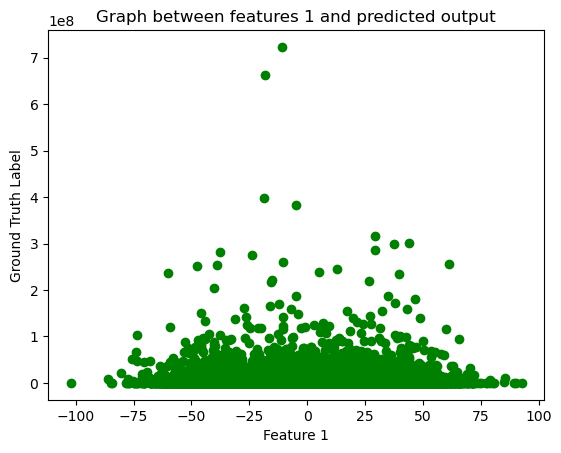

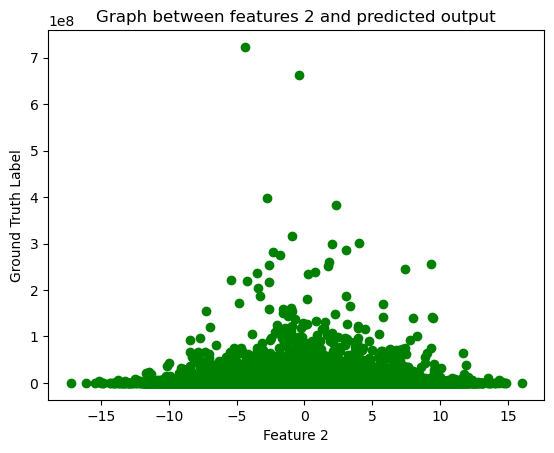

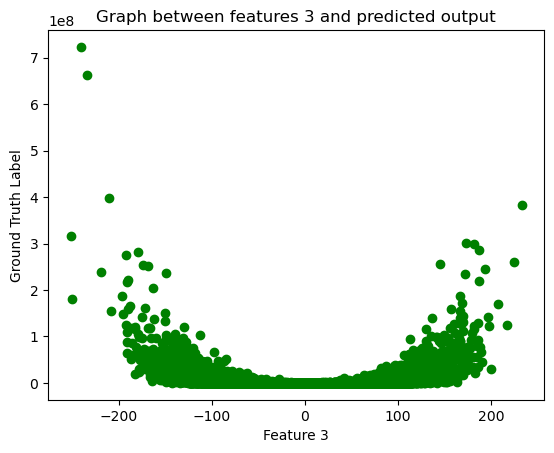

In [44]:
analyse_graphically(x.head(40000),y_train)

In [17]:
X_train = add_polynomial_features(X, 6)
X_cv = add_polynomial_features(x_cv, 6)

print("Shape of X_train:",X_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of X_cv:",X_cv.shape)
print("Shape of y_cv:",y_cv.shape)

Shape of X_train: (40000, 83)
Shape of y_train: (40000,)
Shape of X_cv: (10000, 83)
Shape of y_cv: (10000,)


In [18]:
X_norm = zscore_normalise(X_train)
X_cv_norm = zscore_normalise(X_cv)

print(f"Peak to Peak value before normalisation:{np.ptp(X_train)}")
print(f"Peak to Peak value after normalisation:{np.ptp(X_norm)}")

Peak to Peak value before normalisation:297567950729871.4
Peak to Peak value after normalisation:214.00230096456772


In [19]:
w,b = initialise_parameters(X_train)

# Running Polynomial Regression

In [20]:
alpha = 0.01
iterations = 2000

wf,bf,J = gradient_descent(X_norm,y_train,w,b,compute_cost,gradient,alpha,iterations)

Iteration     0: Cost 57659354057931.875
Iteration   200: Cost 2488801866207.382
Iteration   400: Cost 990353752225.1282
Iteration   600: Cost 559204555248.3466
Iteration   800: Cost 385095045427.808
Iteration  1000: Cost 297541951026.8617
Iteration  1200: Cost 245569393853.98254
Iteration  1400: Cost 210927013224.75058
Iteration  1600: Cost 185900610341.68317
Iteration  1800: Cost 166736684513.1308
_____________________________________________________________________________
Final Cost is = 151475173456.59366
_____________________________________________________________________________
b,w found by gradient descent:
b_final = 1745315.686851
_____________________________________________________________________________
w_final =
 [-5.99403318e+04 -1.17939671e+06  3.59694571e+05  2.87247531e+06
 -4.49226679e+05  6.75794789e+06 -1.40449139e+04 -3.93738202e+04
  6.23096968e+04 -1.34341650e+05 -3.91264288e+04  1.29022990e+06
  9.60025802e+04 -5.84575758e+04 -3.07579601e+05  3.43900246e+04
 

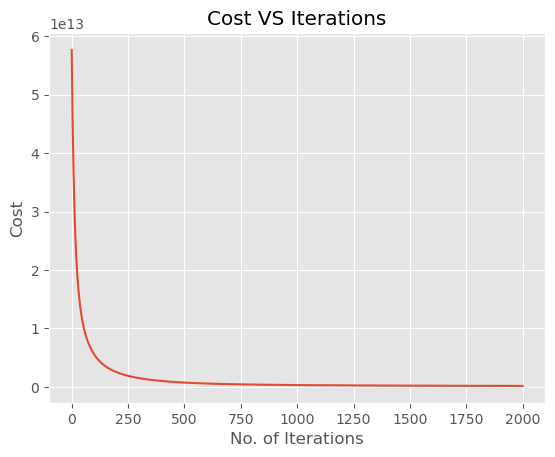

In [21]:
cost_vs_iterations(J)

In [22]:
R2_train = r2_score(X_norm,y_train,wf,bf)
R2_train

0.997467129167887

# R2 Score on CV set

In [23]:
R2_cv = r2_score(X_cv_norm,y_cv,wf,bf)
R2_cv

0.9925980053403207

In [24]:
a_cv = predict(X_cv_norm,wf,bf)
print(a_cv)

[21490324.01293677  -163100.29870817  -379554.94394526 ...
  3713725.83548761  -500786.44303816  -291956.73954962]


In [25]:
len(a_cv)

10000

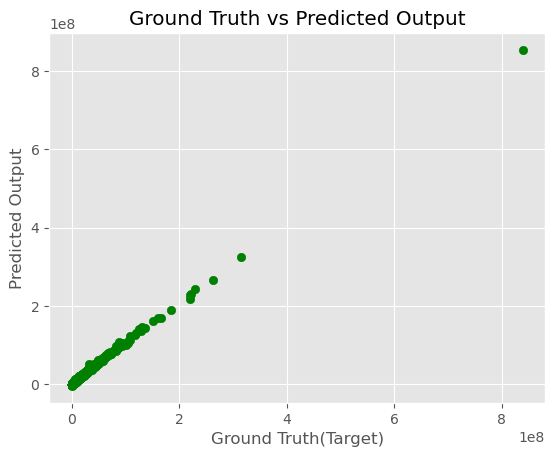

In [26]:
plot_target_vs_predict(y_cv,a_cv)

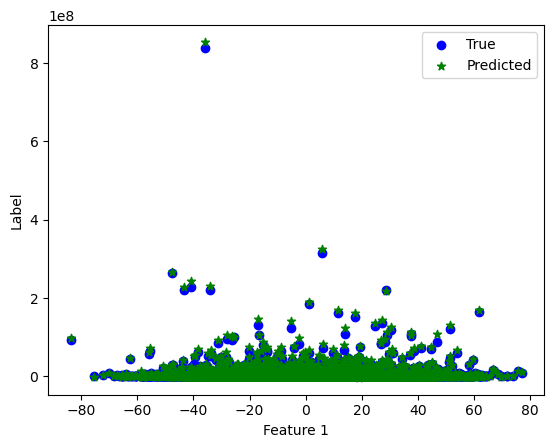

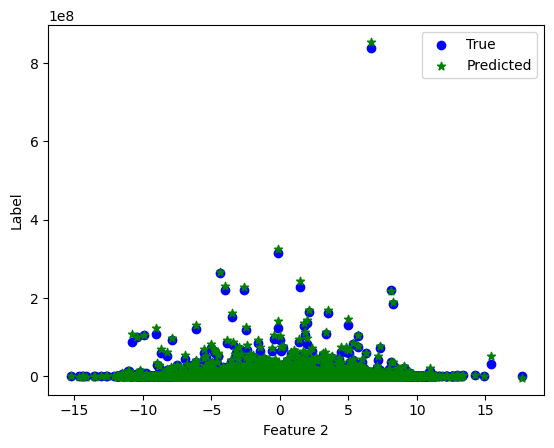

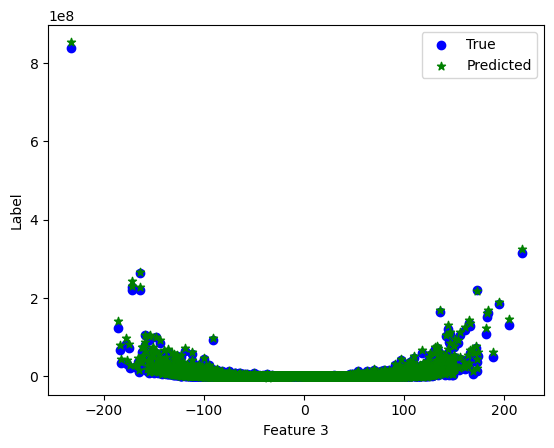

In [45]:
output_vs_pred(x_cv, a_cv, y_cv)

# Predicting on the Test Set using the updated parameters

In [27]:
X_test = add_polynomial_features(X_t, 6)

X_test.shape

(10000, 83)

In [28]:
X_test_norm = zscore_normalise(X_test)

print(f"Peak to Peak value before normalisation: {np.ptp(X_test)}")
print(f"Peak to Peak value after normalisation: {np.ptp(X_test_norm)}")

Peak to Peak value before normalisation: 151890290866236.53
Peak to Peak value after normalisation: 131.85135632284184


In [29]:
a_test = predict(X_test_norm,wf,bf)
a_test.shape

(10000,)

In [30]:
df_t = pd.DataFrame(a_test, columns=['Prediction'])

df_t

,Prediction
0,-346183.492869
1,175979.563682
2,-446319.617895
3,-6934.098197
4,-97084.705855
...,...
9995,-677127.538418
9996,-111315.303800
9997,-102920.557590
9998,-601084.618276


In [31]:
df_t.to_csv('Polynomial_pred.csv')